# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [16]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

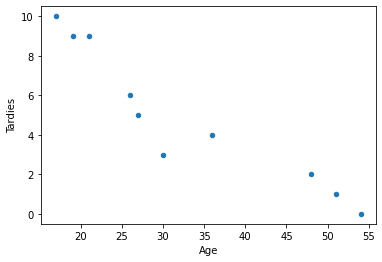

In [19]:
student_data.plot.scatter(x='Age',y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
'''
The younger the student, the more late they go to school
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [21]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [22]:
'''
Covariance show you how the two variables differ, whereas correlation shows you how the two variables are related.
High negative covariance and high negative correlation show that there must be a strong inversely proportional relationship.
'''

'\nCovariance shows you how the two variables differ, whereas correlation shows you how the two variables are related.\nHigh negative covariance and high negative correlation show that there must be a strong inversely proportional relationship.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [24]:
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [ ]:
'''
I use the linear regression 
'''

Plot your regression model on your scatter plot.

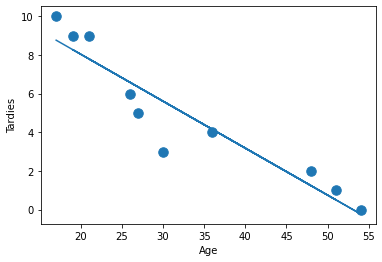

In [34]:
student_data.plot.scatter(x='Age', y='Tardies', s=90)
plt.plot(X, X*slope + intercept)


<AxesSubplot:xlabel='Age', ylabel='Tardies'>

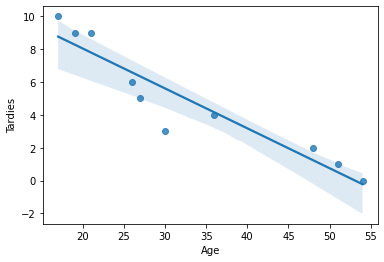

In [51]:
sns.regplot(x='Age', y='Tardies', data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
''' 
age is a good predictor of tardiness
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
## import libraries:

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## import data
cars=pd.read_csv('vehicles.csv')
cars


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [42]:
cars = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
cars.corr()


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


<AxesSubplot:>

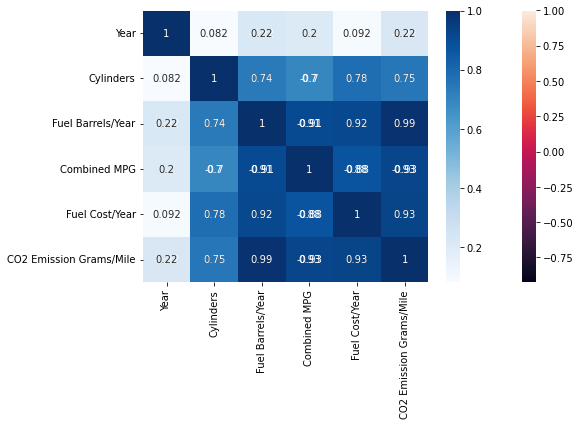

In [69]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(cars.corr(),annot=True)

sns.heatmap(np.abs(cars.corr()),annot=True, cmap="Blues")

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
X = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = cars[['CO2 Emission Grams/Mile']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [ ]:
'''
I use Multiple linear regression
'''

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [46]:
results.params

const                769.888284
Year                  -0.320617
Cylinders              1.878800
Fuel Barrels/Year     19.052925
Combined MPG          -3.040399
Fuel Cost/Year         0.032309
dtype: float64

In [ ]:
'''
The most important seem to be fuel barrels/year, which makes sense, since if we assume that the cars have about the same miles/year, then the more fuel barrels they have the more CO2 that would produce. 
Cylinders also seem to play a role, since the more cylinders a car has the more it tends to burn. 
Lastly, combined MPG is inversely associated, since the higer MPG, the lower CO2 you produce per mile.
'''

#### 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [47]:
X=[1,3,4,6,8,9,11,14]
Y=[1,2,4,4,5,7,8,13]
people = pd.DataFrame({'X': X, 'Y': Y})
people

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

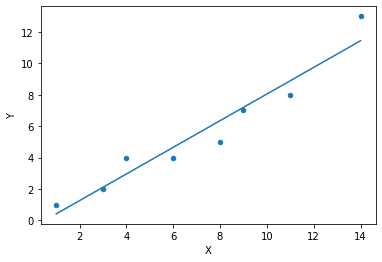

In [61]:
X = people['X']
Y = people['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
people.plot.scatter('X','Y')
plt.plot(X, X*slope + intercept)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [62]:
# add a constant to x to include the intercept in the regression
X = sm.add_constant(X)

# fit the regression model
model = sm.OLS(Y, X)
results = model.fit()

# print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           0.000102
Time:                        17:34:02   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\lehai\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

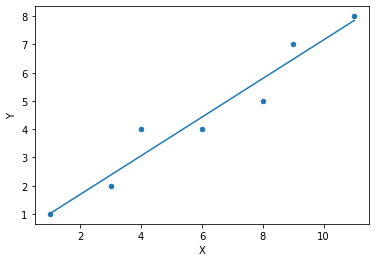

In [65]:
pp = people.loc[people['X'] != 14]
X1 = pp['X']
Y1 = pp['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X1, Y1)
pp.plot.scatter(x='X', y='Y')
plt.plot(X1, X1*slope + intercept)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [66]:
X1 = sm.add_constant(X1)

# fit the regression model
model = sm.OLS(Y1, X1)
results = model.fit()

# print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           0.000264
Time:                        17:41:22   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

C:\Users\lehai\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
